In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from tqdm import tqdm
import sympy as sym

import colour as cr
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve


import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

import random as rd


In [2]:
#Punto 4
def acceleration(r,v):
    return -r

def Simplectic(CI,t0, tf, N, acc, order = 2):
    t = np.linspace(t0, tf, N)
    h = (t[-1]-t[0])/(N-1)
    r = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    
    #Se inicializan las condiciones iniciales
    r[0] = CI[0]
    v[0] = CI[1]
    a[0] = acc(r[0], v[0])
    
    
    #Definimos los coeficientes
    if order == 4:
        x1 = 1/((2-2**(1/3)))
        x0 = -(2**(1/3))/((2-2**(1/3)))
        xx = [x1, x0, x1]
    
    else:
        xx = [1]

    #Se aplica la relación de recurrencia del integrador
    for i in range(N-1):
        rj = r[i]
        vj = v[i]
        #De acuerdo a lo que inidicaba el paper, se tenía que para el operador 
        #Simpléctico de orden 4 S4(h) se debe aplicar tres veces el operador S2, simplectico de orden 2
        #3 veces segúidas con distintos coeficientes. Así, S4(h) = S2(x1*h)S2(x0*h)S2(x1*h), donde x1 y x0, son 
        # los coeficientes indicados anteriormente. Además, S2(h) = exp(0.5*h*B)exp(h*A)exp(0.5*h*B), donde A y B son
        # A = v cdot grad_r y B = a cdot grad_v . 
        
        #En cada iteración del siguiente del siguiente for 
        #transforma a r_n y v_n por medio del operador S2(xx[j]*h)
        
        for j in range(len(xx)):
            #Las variables con p indican el pasado
            rp = rj 
            vp = vj
            ap = acc(rj, vj)
            rj = (rp + (vp + xx[j]*ap*h/2)*xx[j]*h)   
            vj = vp + ap*h/2*xx[j] + acc(rj, vj)*xx[j]*h/2
    
        v[i+1] = vj
        r[i+1] = rj
        a[i+1] = acc(rj, vj)
    
    if( i == 0):
        r[i+1] = r[i] + v[i]*h
        v[i+1] = v[i] + a[i]*h
        a[i+1] = acc(r[i+1], v[i+1])
        
    U = 0.5*r**2
    K = 0.5*v**2
    return U, K, t, r, v,a #Se retornan las energías y r,v,a


<IPython.core.display.Javascript object>


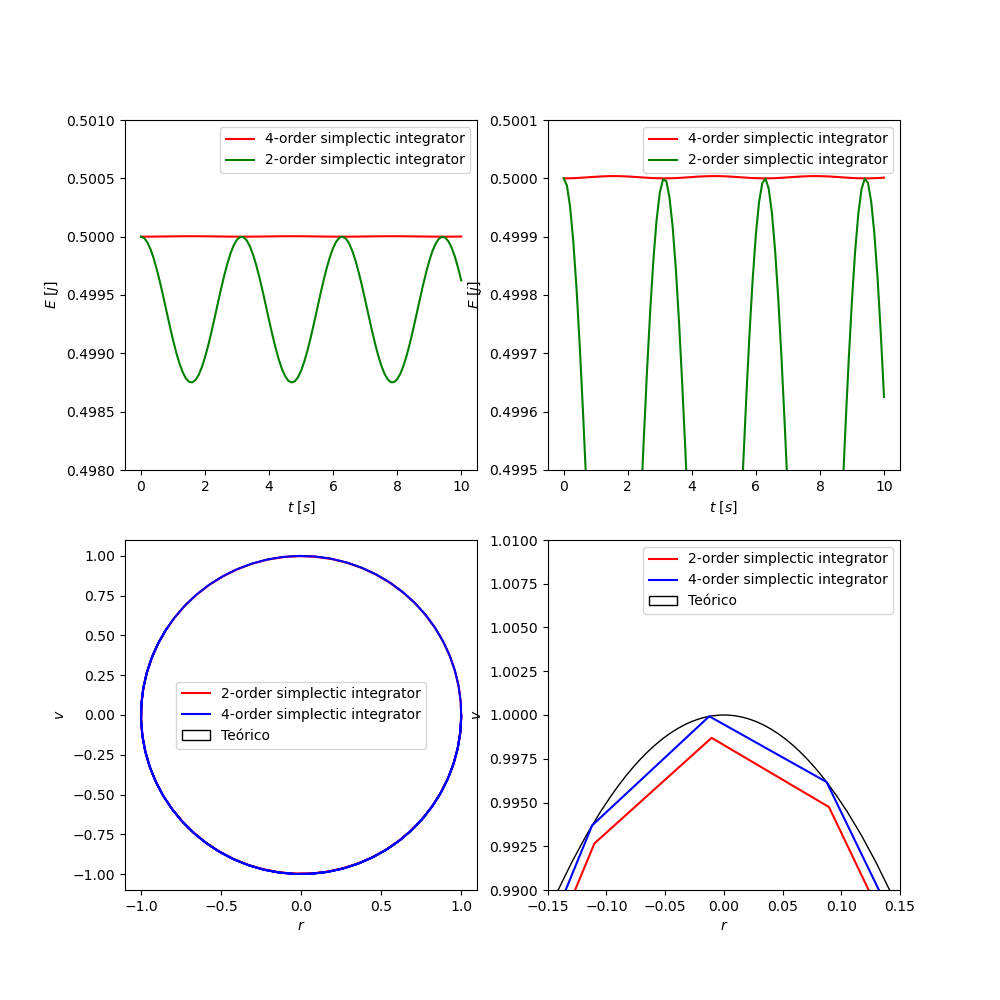

In [43]:
t0, tf = 0, 10
N = 101
r0 = [1,0]
U4, K4, t4, r4, v4, a4 = Simplectic(r0, t0, tf, N, acceleration, order = 4)
U2, K2, t2, r2, v2, a2 = Simplectic(r0, t0, tf, N, acceleration, order = 2)
    
E4 = U4 + K4
E2 = U2 + K2

fig = plt.figure(figsize =(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(t4,E4, color="red", label = "4-order simplectic integrator")
ax1.plot(t2,E2, color="green", label = "2-order simplectic integrator")
ax1.set_xlabel("$t \ [s]$")
ax1.set_ylabel("$E \ [j]$")
ax1.set_ylim(0.498, 0.501)
ax1.legend()


ax2 = fig.add_subplot(2,2,2)
ax2.plot(t4,E4, color="red", label = "4-order simplectic integrator")
ax2.plot(t2,E2, color="green", label = "2-order simplectic integrator")
ax2.set_xlabel("$t \ [s]$")
ax2.set_ylabel("$E \ [j]$")
ax2.set_ylim(0.4995, 0.5001)
ax2.legend()

ax3 = fig.add_subplot(2,2,3)
ax3.plot(r2,v2, color="red", label = "2-order simplectic integrator")
ax3.plot(r4,v4, color="blue", label = "4-order simplectic integrator")
teo = plt.Circle((0,0), radius=1, fill=False, color="black", label = "Teórico")
ax3.add_patch(teo)
ax3.set_xlabel("$r \ $")
ax3.set_ylabel("$v \ $")
ax3.legend()


ax4 = fig.add_subplot(2,2,4)
ax4.plot(r2,v2, color="red", label = "2-order simplectic integrator")
ax4.plot(r4,v4, color="blue", label = "4-order simplectic integrator")
teo = plt.Circle((0,0), radius=1, fill=False, color="black", label = "Teórico")
ax4.add_patch(teo)
ax4.set_xlabel("$r \ $")
ax4.set_ylabel("$v \ $")
ax4.set_ylim(0.99, 1.01)
ax4.set_xlim(-0.15, 0.15)
ax4.legend()

#ax2.set_ylim(0.75, 1)
#NOTAAAAAA: La gráfica obtenida a continuación es distinta a la mostrada en el enunciado.
#Sin embargo, considero que esta gráfica es correcta dado que en el tiempo t = 0, los valores
# de energía para cada método deben ser escencialmente los mismos, dado que tienen los mismos valores
#de posición y velocidad al ser estos las condiciones iniciales dadas. 




#También se graficarán las posiciones y momentos en el espacio de fase
